# DAA 22/23 - CrashDataSet

## Import List

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
!pip install holidays
%matplotlib inline

# Set the size to all seaborn figures
sns.set(rc={'figure.figsize':(12,8)})

dataSetOrig = pd.read_csv("training_data.csv")
dataSet = dataSetOrig.copy(deep=True)
testDataSetOrig = pd.read_csv("test_data.csv")
testDataSet = testDataSetOrig.copy(deep=True)

targetFeature = "incidents"

## Visualização do DataSet

A nossa equipa vai começar por analisar o DataSet fornecido, analisando os atributos destes e encontrando potenciais problemas e inconsistências presentes nos dados, assim como atributos que possam ajudar no treino dos modelos a serem desenvolvidos.

### Head

In [3]:
dataSetOrig.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


### DataSet Info

In [4]:
dataSetOrig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


### Describe

A partir do comando 'describe', podemos inferir várias estátisticas dos atributos numéricos presentes no DataSet como:

* __'delay_in_seconds'__ possui um distribuição anormal, tendo este valores a 0 até ao percentil 50, subindo abruptamente nos restantes valores. Visto que, em casos reais, estes valores deveriam ser sempre maior que 0, podemos inferir que estes casos são casos onde este valor poderá não ter sido registado corretamente.
* __'avg_precipitation'__ possui valores abnormais, sendo estes todos 0, o que não trará qualquer benefício em termos de informação para o modelo.

In [5]:
dataSetOrig.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


### Análise de valores nos atributos nominais

Analisamos os valores presentes nos vários atributos nominais, podendo inferir que o atributo __'city_name'__ é repetido nas 5000 linhas presentes do DataSet.

In [6]:
print('City Name:',dataSetOrig['city_name'].unique())
print('Magnitude of Delay:',dataSetOrig['magnitude_of_delay'].unique())
print('Luminosity:',dataSetOrig['luminosity'].unique())
print('Average Rain:',dataSetOrig['avg_rain'].unique())
print('Incidents:',dataSetOrig['incidents'].unique())

City Name: ['Guimaraes']
Magnitude of Delay: ['UNDEFINED' 'MAJOR' 'MODERATE']
Luminosity: ['DARK' 'LIGHT' 'LOW_LIGHT']
Average Rain: ['Sem Chuva' 'chuva moderada' 'chuva fraca' 'chuva forte']
Incidents: ['None' 'Low' 'Very_High' 'High' 'Medium']


### Análise de Entradas Duplicadas

Analisamos potenciais entradas duplicadas, verificando que não existem

In [8]:
dataSetOrig[dataSetOrig.duplicated()]

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents


### PairPlot

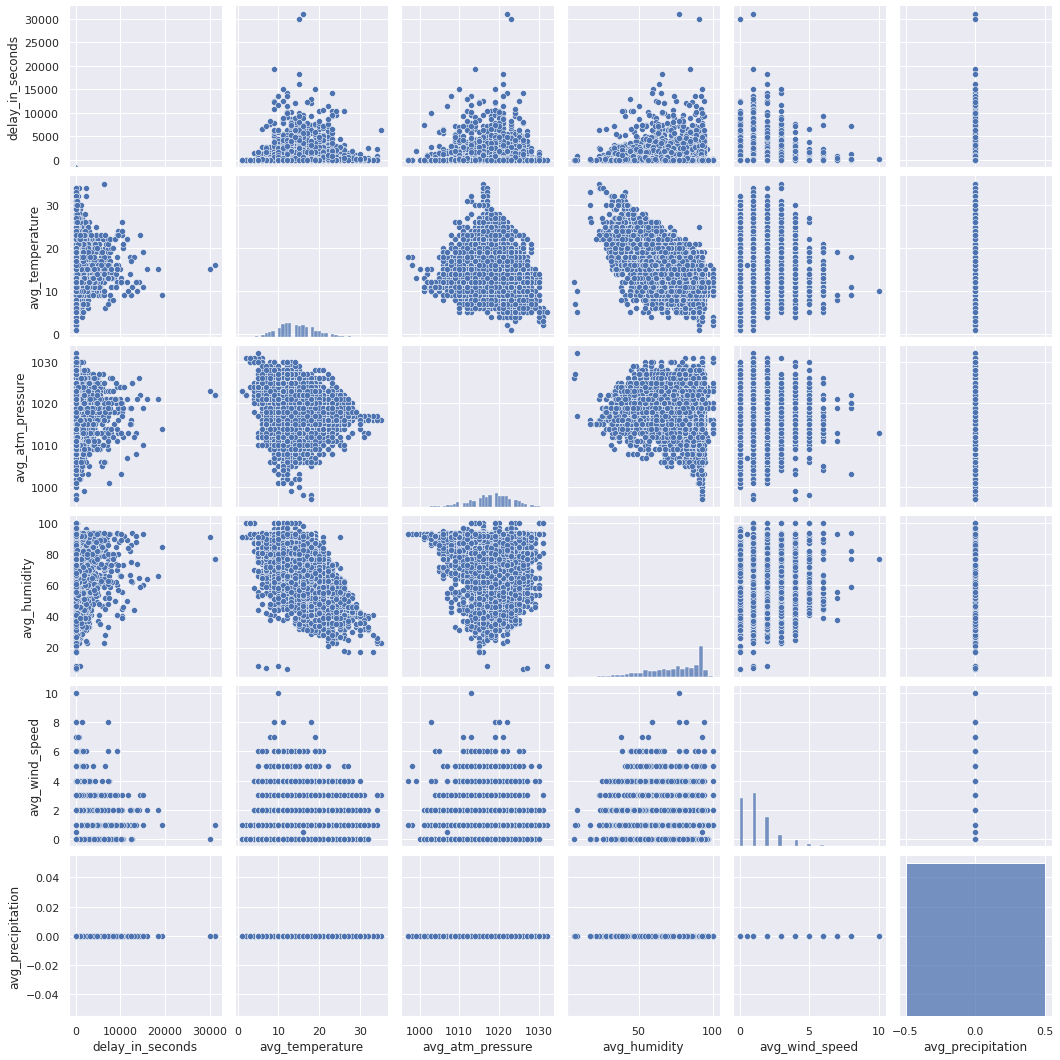

In [9]:
sns.pairplot(dataSetOrig)

### Outiliers

Exploramos os Outliers dos vários atributos do DataSet, podendo confirmar a anormalidade presente nos dados do atributo __'delay_in_seconds'__

#### Avg. Wind Speed

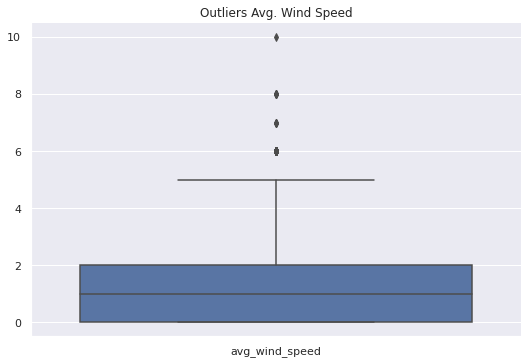

In [10]:
sns.catplot(data=dataSetOrig.drop(['delay_in_seconds','avg_temperature','avg_atm_pressure','avg_humidity','avg_precipitation'],axis=1),kind="box",aspect=1.5)
plt.title("Outliers Avg. Wind Speed")
plt.show()

#### Avg. Humidity

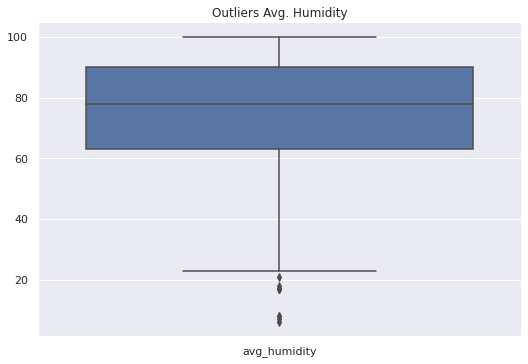

In [11]:
sns.catplot(data=dataSetOrig.drop(['delay_in_seconds','avg_temperature','avg_atm_pressure','avg_wind_speed','avg_precipitation'],axis=1),kind="box",aspect=1.5)
plt.title("Outliers Avg. Humidity")
plt.show()

#### Avg. Atm Pressure

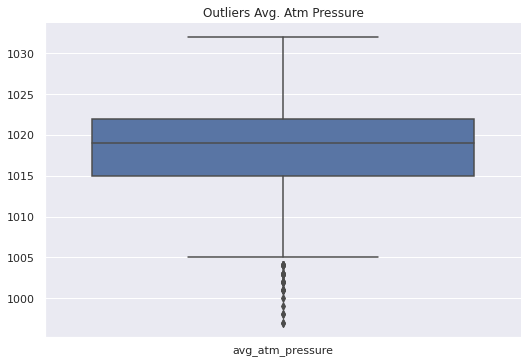

In [12]:
sns.catplot(data=dataSetOrig.drop(['delay_in_seconds','avg_temperature','avg_humidity','avg_wind_speed','avg_precipitation'],axis=1),kind="box",aspect=1.5)
plt.title("Outliers Avg. Atm Pressure")
plt.show()

#### Avg. Temperature

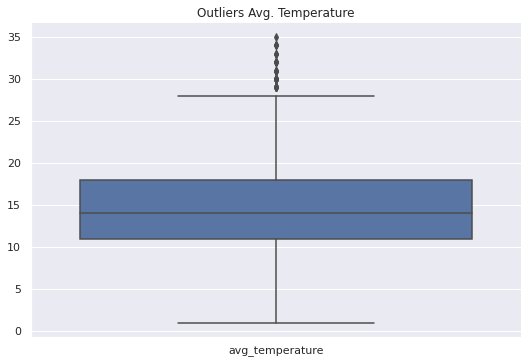

In [13]:
sns.catplot(data=dataSetOrig.drop(['delay_in_seconds','avg_atm_pressure','avg_humidity','avg_wind_speed','avg_precipitation'],axis=1),kind="box",aspect=1.5)
plt.title("Outliers Avg. Temperature")
plt.show()

#### Delay In Seconds

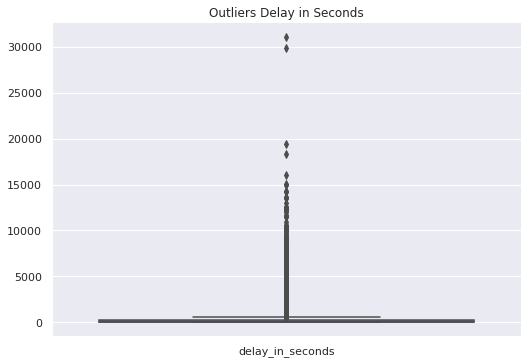

In [14]:
sns.catplot(data=dataSetOrig.drop(['avg_temperature','avg_atm_pressure','avg_humidity','avg_wind_speed','avg_precipitation'],axis=1),kind="box",aspect=1.5)
plt.title("Outliers Delay in Seconds")
plt.show()

### Gráfico de Correlação

De seguida, analisamos a matrix de correlação. Podemos observar e confirmar a anormalidade do __'avg_precipitation'__, assim como a baixa correlação do atributo __'delay_in_seconds'__ com outros atributos e também a média correlação do __'avg_temperature'__ com o atributo __'avg_humidity'__.

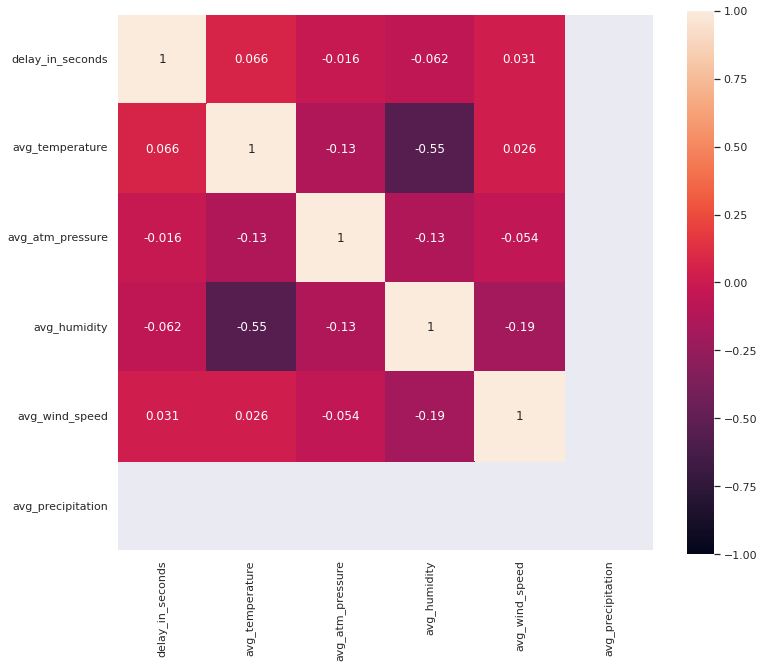

In [15]:
corr_matrix = dataSetOrig.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

### Missing Values

Fizemos a análise de missing values, não encontrando muitos valores em falta, sendo estes relativos ao atributo __'affected_roads'__, o que indica que nestes casos apenas não foram assinaladas as estradas dos incidentes.

<AxesSubplot:>

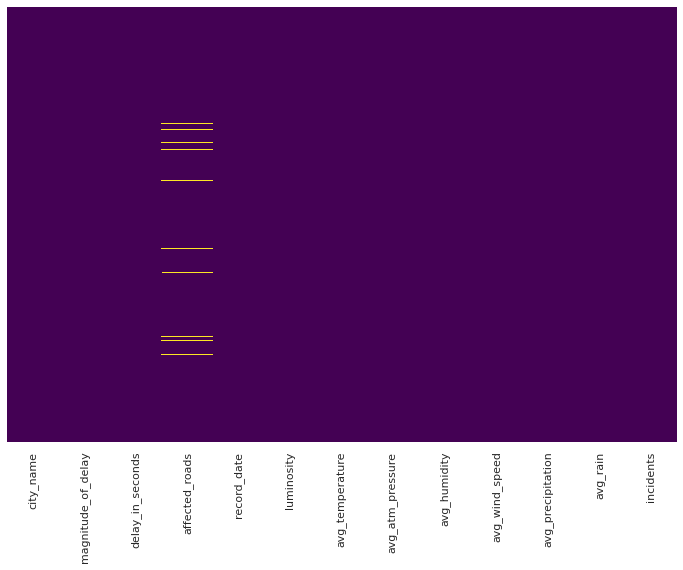

In [16]:
sns.heatmap(dataSetOrig.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Percentagem de Incidentes

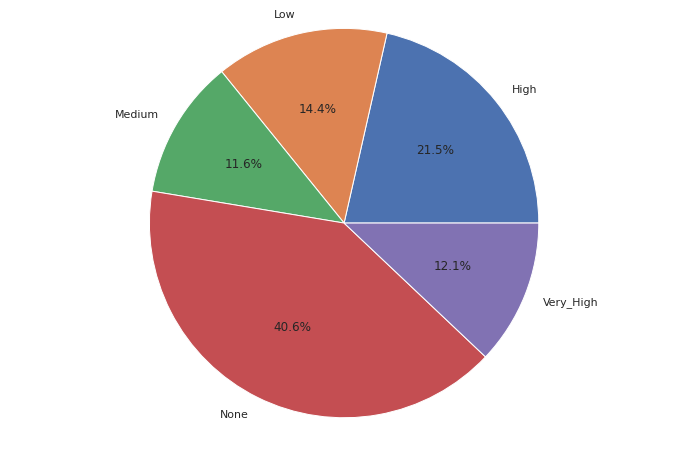

In [17]:
labels = dataSetOrig['incidents'].astype('category').cat.categories.tolist()
counts = dataSetOrig['incidents'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

/home/vicshadow/Program_Files/anaconda3/envs/env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


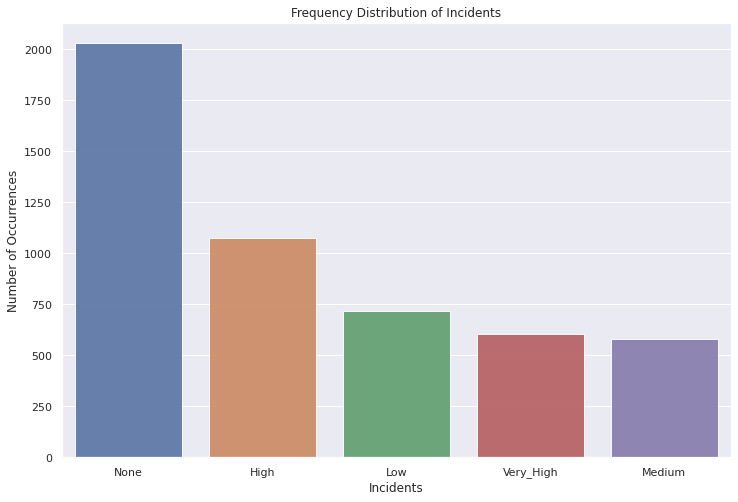

In [18]:
incidents_count = dataSetOrig['incidents'].value_counts()
sns.set(style='darkgrid')
sns.barplot(incidents_count.index, incidents_count.values, alpha=0.9)
plt.title('Frequency Distribution of Incidents')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Incidents', fontsize=12)
plt.show()

## Tratamento e Limpeza de Dados

Passamos ao tratamento do DataSet, utilizando por base o conhecimento obtido na fase de visualização do DataSet.

### Remover colunas redundantes

Visto que os atributos __'city_name'__ e __'avg_precipitation'__ contêm apenas valores repetidos ao longo das 5000 linhas do DataSet, indicando que estas colunas são redundantes e poderão ser removidas.

In [19]:
testDataSet.drop(['city_name','avg_precipitation'],axis=1,inplace=True)
dataSet.drop(['city_name','avg_precipitation'],axis=1,inplace=True)
dataSet.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


### Remover colunas com dados abnormais

Depois de analisar que os atributos __'magnitude_of_delay'__ e __'delay_in_seconds'__ possuem uma correlação anormal, decidimos retiar a coluna __'magnitude_of_delay'__.

In [20]:
testDataSet.drop(['magnitude_of_delay'],axis=1,inplace=True)
dataSet.drop(['magnitude_of_delay'],axis=1,inplace=True)
dataSet.head()

,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


### Adição da coluna Number of Incidents

No atributo __'affect_roads'__, existe uma lista de estradas que o acidente afetou. Visto que esta lista possui muitos valores repetidos, podemos inferir que esta corresponde a vários acidentes que ocorreram nessa estrada. Logo, decidimos extrair este número como __'number_of_affected_roads'__.

Ao concluir este tratamento podemos ver que existe uma certa relação entre o atributo alvo __'incidents'__ e a nova coluna gerada.

In [21]:
numberOfAfRoads = []
for value in testDataSetOrig['affected_roads']:
    numberOfAfRoads.append(len(list(filter(None, str(value).split(",")))))
    
testDataSet['number_of_affected_roads'] = numberOfAfRoads


numberOfAfRoads = []
for value in dataSetOrig['affected_roads']:
    numberOfAfRoads.append(len(list(filter(None, str(value).split(",")))))
    
dataSet['number_of_affected_roads'] = numberOfAfRoads
dataSet.head()

,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,number_of_affected_roads
0,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,0
1,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,1
2,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0
3,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,11
4,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,5


### Remover Affected Roads duplicados

Com a coluna __'number_of_incidents'__ extraida, decidimos remover as estradas repetidas presentes no __'affected_roads'__.

In [22]:
res = [] 
for value in testDataSetOrig['affected_roads']:
    aux = np.unique(list(filter(None, str(value).split(","))))
    tmp = ""
    for elem in aux:
        tmp += str(elem)+","
    if len(aux) == 0:
        tmp += ","
    res.append(tmp)
        
testDataSet['affected_roads'] = res


res = [] 
for value in dataSetOrig['affected_roads']:
    aux = np.unique(list(filter(None, str(value).split(","))))
    tmp = ""
    for elem in aux:
        tmp += str(elem)+","
    if len(aux) == 0:
        tmp += ","
    res.append(tmp)
        
dataSet['affected_roads'] = res
dataSet.head()

,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,number_of_affected_roads
0,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,0
1,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,1
2,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0
3,2297,"N101,N105,R206,",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,11
4,0,"N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,5


### Adição da coluna Unique roads affected

Com a lista de estradas afetadas reduzida aos seus valores únicos, decidimos extrair este para uma coluna chamada __'unique_roads_affected'__.

In [23]:
uniqueRoadsAff = []
for value in testDataSet['affected_roads']:
    uniqueRoadsAff.append(len(list(filter(None, str(value).split(",")))))
    
testDataSet['unique_roads_affected'] = uniqueRoadsAff


uniqueRoadsAff = []
for value in dataSet['affected_roads']:
    uniqueRoadsAff.append(len(list(filter(None, str(value).split(",")))))
    
dataSet['unique_roads_affected'] = uniqueRoadsAff
dataSet.head()

,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,number_of_affected_roads,unique_roads_affected
0,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,0,0
1,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,1,1
2,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0,0
3,2297,"N101,N105,R206,",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,11,3
4,0,"N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,5,1


### Extrair Mês / Hora / Dia da Semana / Feriado do Incidente

Através da data fornecida no atributo __'record_date'__, decidimos extrair novas informações como o Mês, Hora, Dia da semana e caso este dia corresponda a um feriado visto que estes dados poderão ajudar o modelo na previsão do número de acidentes.

In [24]:
import re
import datetime
import holidays
pattern="(\d{4})-(\d\d)-(\d\d) (\d\d):\d\d"


monthNumberList = []
hourNumberList = []
weekDayNumberList = []
feriadoList = []
for value in testDataSetOrig['record_date']:
    rege = re.search(pattern,str(value))
    actDate = datetime.datetime(int(rege.group(1)), int(rege.group(2)), int(rege.group(3)))
    isferiado = False
    for feriados in holidays.Portugal(years=2021).items():
        if(str(feriados[0]) == str(actDate.date())):
            isferiado = True
    
    
    monthNumberList.append(rege.group(2))
    hourNumberList.append(rege.group(4))
    weekDayNumberList.append(actDate.weekday())
    if (isferiado):
        feriadoList.append(int(1))
    else:
        feriadoList.append(int(0))
    
testDataSet['month'] = monthNumberList
testDataSet['hour'] = hourNumberList
testDataSet['week_day'] = weekDayNumberList
testDataSet['holiday'] = feriadoList
testDataSet.drop(['record_date'],axis=1,inplace=True)


monthNumberList = []
hourNumberList = []
weekDayNumberList = []
feriadoList = []
for value in dataSetOrig['record_date']:
    rege = re.search(pattern,str(value))
    actDate = datetime.datetime(int(rege.group(1)), int(rege.group(2)), int(rege.group(3)))
    isferiado = False
    for feriados in holidays.Portugal(years=2021).items():
        if(str(feriados[0]) == str(actDate.date())):
            isferiado = True
    
    
    monthNumberList.append(rege.group(2))
    hourNumberList.append(rege.group(4))
    weekDayNumberList.append(actDate.weekday())
    if (isferiado):
        feriadoList.append(int(1))
    else:
        feriadoList.append(int(0))
    
dataSet['month'] = monthNumberList
dataSet['hour'] = hourNumberList
dataSet['week_day'] = weekDayNumberList
dataSet['holiday'] = feriadoList
dataSet.drop(['record_date'],axis=1,inplace=True)
dataSet.head()

,delay_in_seconds,affected_roads,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,number_of_affected_roads,unique_roads_affected,month,hour,week_day,holiday
0,0,",",DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,0,0,03,23,0,0
1,385,"N101,",DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,1,1,12,18,5,1
2,69,",",LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0,0,03,15,4,0
3,2297,"N101,N105,R206,",LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,11,3,09,09,2,0
4,0,"N101,",LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,5,1,06,11,6,0


### Label Encoding: Avg Rain

Decidimos aplicar a técnica de __Label Encoding__ no atributo __'avg_rain'__

In [25]:
print(dataSetOrig['avg_rain'].unique())

convertChuvDict = {
    'Sem Chuva':0,
    'chuva moderada':1,
    'chuva fraca':2,
    'chuva forte':3
}

avgChuvaList = []
for value in testDataSetOrig['avg_rain']:
    avgChuvaList.append(convertChuvDict[str(value)])

testDataSet.drop(['avg_rain'],axis=1,inplace=True)    
testDataSet['avg_rain'] = avgChuvaList



avgChuvaList = []
for value in dataSetOrig['avg_rain']:
    avgChuvaList.append(convertChuvDict[str(value)])

dataSet.drop(['avg_rain'],axis=1,inplace=True)    
dataSet['avg_rain'] = avgChuvaList
dataSet.head()

['Sem Chuva' 'chuva moderada' 'chuva fraca' 'chuva forte']


,delay_in_seconds,affected_roads,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,incidents,number_of_affected_roads,unique_roads_affected,month,hour,week_day,holiday,avg_rain
0,0,",",DARK,12.0,1013.0,70.0,1.0,None,0,0,03,23,0,0,0
1,385,"N101,",DARK,12.0,1007.0,91.0,1.0,None,1,1,12,18,5,1,0
2,69,",",LIGHT,14.0,1025.0,64.0,0.0,Low,0,0,03,15,4,0,0
3,2297,"N101,N105,R206,",LIGHT,15.0,1028.0,75.0,1.0,Very_High,11,3,09,09,2,0,0
4,0,"N101,",LIGHT,27.0,1020.0,52.0,1.0,High,5,1,06,11,6,0,0


### Label Encoding: Luminosity

Decidimos aplicar a técnica de __Label Encoding__ no atributo __'luminosity'__

In [26]:
print(dataSetOrig['luminosity'].unique())

convertLuminDict = {
    'DARK':0,
    'LOW_LIGHT':1,
    'LIGHT':2
}

luminList = []
for value in testDataSetOrig['luminosity']:
    luminList.append(convertLuminDict[str(value)])

testDataSet.drop(['luminosity'],axis=1,inplace=True)    
testDataSet['luminosity'] = luminList


luminList = []
for value in dataSetOrig['luminosity']:
    luminList.append(convertLuminDict[str(value)])

dataSet.drop(['luminosity'],axis=1,inplace=True)    
dataSet['luminosity'] = luminList
dataSet.head()

['DARK' 'LIGHT' 'LOW_LIGHT']


,delay_in_seconds,affected_roads,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,incidents,number_of_affected_roads,unique_roads_affected,month,hour,week_day,holiday,avg_rain,luminosity
0,0,",",12.0,1013.0,70.0,1.0,None,0,0,03,23,0,0,0,0
1,385,"N101,",12.0,1007.0,91.0,1.0,None,1,1,12,18,5,1,0,0
2,69,",",14.0,1025.0,64.0,0.0,Low,0,0,03,15,4,0,0,2
3,2297,"N101,N105,R206,",15.0,1028.0,75.0,1.0,Very_High,11,3,09,09,2,0,0,2
4,0,"N101,",27.0,1020.0,52.0,1.0,High,5,1,06,11,6,0,0,2


## Treino e Teste de Modelos

#### Imports

In [27]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest, chi2, f_classif, VarianceThreshold
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

RANDOM_SEED = 2021

#### Divisão do DataSet para Teste/Treino

In [28]:
x = dataSet.drop([targetFeature],axis=1)
y = dataSet[targetFeature].to_frame()

#### Categorização de Atributos

In [29]:
numerical_features = [c for c, dtype in zip(x.columns, x.dtypes)
                     if dtype.kind in ['i','f']]
categorical_features = [c for c, dtype in zip(x.columns, x.dtypes)
                     if dtype.kind not in ['i','f']]

### Decision Tree

#### Treino

In [31]:
clf = DecisionTreeClassifier(random_state=RANDOM_SEED)
clf.fit(x.drop(categorical_features,axis=1),y)

DecisionTreeClassifier(random_state=2021)

#### Teste

In [33]:
clfPredictions = clf.predict(testDataSet.drop(categorical_features,axis=1))

#### Prepara Submissão

In [34]:
fileSub = open("submissoes/clfSubmissao.csv", "w")
fileSub.write("RowId,Incidents\n")

idx = int(1)
for elem in clfPredictions:
    fileSub.write(str(idx)+","+str(elem)+"\n")
    idx = idx + 1

fileSub.close()

### Random Forest - Simple

In [35]:
preprocessor = make_column_transformer(
    (make_pipeline(
        SimpleImputer(strategy = 'median'),
        #KNNImputer(n_neighbors=2, weights="uniform"),
        MinMaxScaler()
    ),
     numerical_features),
    (make_pipeline(
        SimpleImputer(strategy = "constant", fill_value="missing"),
        OneHotEncoder(categories = "auto", handle_unknown= "ignore")
    ),
     categorical_features),
)

preprocessor_best = make_pipeline(
    preprocessor,
    VarianceThreshold(),
    SelectKBest(f_classif, k= 50)
)

#### Treino

In [36]:
RF_Model = make_pipeline(preprocessor_best, RandomForestClassifier(n_estimators = 100))
RF_Model.fit(x,y)

/home/vicshadow/Program_Files/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/vicshadow/Program_Files/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('minmaxscaler',
                                                                                    MinMaxScaler())]),
                                                                   ['delay_in_seconds',
                                                                    'avg_temperature',
                                                                    'avg_atm_pressure',
                                                                    'avg_humidity',
                                                                 

#### Teste

In [37]:
RFPredictions = RF_Model.predict(testDataSet)

#### Prepara Submissão

In [38]:
fileSub = open("submissoes/rfSubmissao.csv", "w")
fileSub.write("RowId,Incidents\n")

idx = int(1)
for elem in RFPredictions:
    fileSub.write(str(idx)+","+str(elem)+"\n")
    idx = idx + 1

fileSub.close()

### Random Forest with HyperParameter Tuning

#### Definição de Parâmetros

In [39]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 2)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree
max_depth = [2,6,8,10,]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8,]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [40]:
# Create the param grid
param_grid = {'randomforestclassifier__n_estimators': n_estimators,
              'randomforestclassifier__max_features': max_features,
              'randomforestclassifier__max_depth': max_depth,
              'randomforestclassifier__min_samples_split': min_samples_split,
              'randomforestclassifier__min_samples_leaf': min_samples_leaf,
              'randomforestclassifier__bootstrap': bootstrap
             }
print(param_grid)

{'randomforestclassifier__n_estimators': [50, 300], 'randomforestclassifier__max_features': ['auto', 'sqrt'], 'randomforestclassifier__max_depth': [2, 6, 8, 10], 'randomforestclassifier__min_samples_split': [2, 5, 8], 'randomforestclassifier__min_samples_leaf': [1, 2, 3], 'randomforestclassifier__bootstrap': [True, False]}


#### Treino

In [41]:
from sklearn.model_selection import RandomizedSearchCV

RFHPRandomGrid = RandomizedSearchCV(estimator = RF_Model, param_distributions = param_grid, cv = 5, verbose=1, n_jobs = -1, n_iter = 10, scoring = 'f1_micro')

In [42]:
RFHPRandomGrid.fit(x,y)
RFHPRandomGrid.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/vicshadow/Program_Files/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/vicshadow/Program_Files/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('minmaxscaler',
                                                                                    MinMaxScaler())]),
                                                                   ['delay_in_seconds',
                                                                    'avg_temperature',
                                                                    'avg_atm_pressure',
                                                                    'avg_humidity',
                                                                 

#### Teste

In [43]:
RFHPPredictions = RFHPRandomGrid.predict(testDataSet)

#### Prepara a Submissão

In [44]:
fileSub = open("submissoes/rfhpSubmissao.csv", "w")
fileSub.write("RowId,Incidents\n")

idx = int(1)
for elem in RFHPPredictions:
    fileSub.write(str(idx)+","+str(elem)+"\n")
    idx = idx + 1

fileSub.close()

### XGBoost - Simples

In [45]:
preprocessor = make_column_transformer(
    (make_pipeline(
        #SimpleImputer(strategy = 'median')
        KNNImputer(n_neighbors=2, weights="uniform"),
        MinMaxScaler()),
     numerical_features),
    (make_pipeline(
        SimpleImputer(strategy = "constant", fill_value = "missing"),
        OneHotEncoder(categories = "auto", handle_unknown = "ignore")),
     categorical_features),
)

preprocessor_best = make_pipeline(
    preprocessor,
    VarianceThreshold(),
    SelectKBest(f_classif, k = 50)
)

In [46]:
from xgboost import XGBClassifier
import xgboost as xgb
XG_model = make_pipeline(preprocessor_best, XGBClassifier(n_estimators = 100))

In [47]:
XG_model.fit(x,y)

/home/vicshadow/Program_Files/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/vicshadow/Program_Files/anaconda3/envs/env/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:18:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('knnimputer',
                                                                                    KNNImputer(n_neighbors=2)),
                                                                                   ('minmaxscaler',
                                                                                    MinMaxScaler())]),
                                                                   ['delay_in_seconds',
                                                                    'avg_temperature',
                                                                    'avg_atm_pressure',
                                                                    'avg_humidity',
                                                                    'avg_wi

In [48]:
XGBPredictions = XG_model.predict(testDataSet)

In [49]:
fileSub = open("submissoes/xgbSubmissao.csv", "w")
fileSub.write("RowId,Incidents\n")

idx = int(1)
for elem in XGBPredictions:
    fileSub.write(str(idx)+","+str(elem)+"\n")
    idx = idx + 1

fileSub.close()

### Support Vector Machine

#### Treino

In [50]:
svmModel = SVC(random_state=RANDOM_SEED)
svmModel.fit(x.drop(categorical_features,axis=1),y)

/home/vicshadow/Program_Files/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(random_state=2021)

#### Teste

In [51]:
svmPredictions = svmModel.predict(testDataSet.drop(categorical_features,axis=1))

#### Prepara Submissão

In [52]:
fileSub = open("submissoes/svmSubmissao.csv", "w")
fileSub.write("RowId,Incidents\n")

idx = int(1)
for elem in svmPredictions:
    fileSub.write(str(idx)+","+str(elem)+"\n")
    idx = idx + 1

fileSub.close()